In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import geodatasets

In [3]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))

Extracting 'chicago_commpop/chicago_commpop.geojson' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\chicago_commpop.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\chicago_commpop.zip.unzip'
Extracting 'grocery/chicago_sup.shp' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.dbf' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.shx' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.prj' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\gr

In [16]:
groceries = groceries.to_crs(chicago.crs)

In [20]:
groceries_with_community = gpd.sjoin(groceries, chicago, predicate="within", how="left")

In [26]:
groceries_pop = groceries_with_community.merge(
    chicago[['community', 'POP2010']], 
    on='community', 
    how='left')

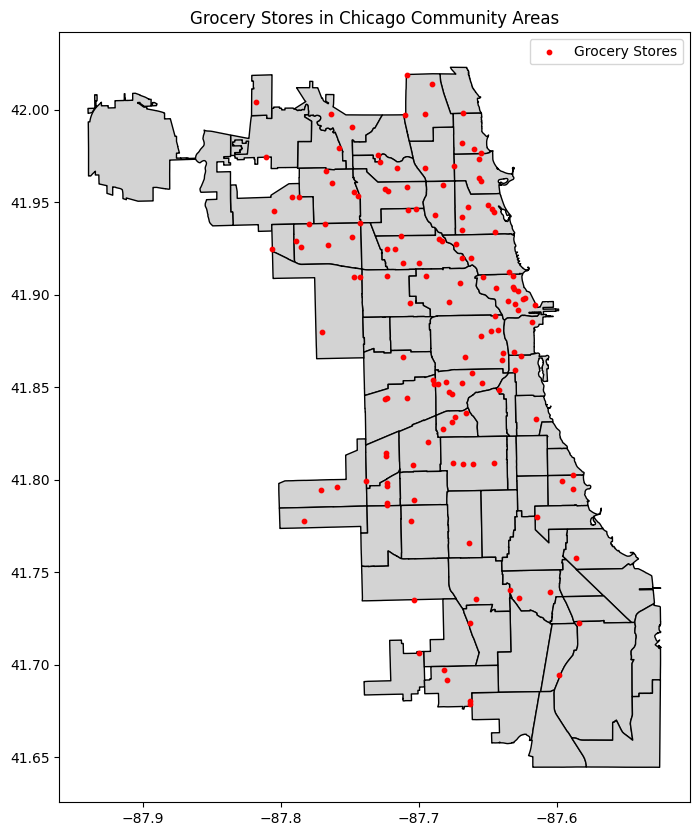

In [28]:
# Plot the community areas
ax = chicago.plot(figsize=(10, 10), color="lightgray", edgecolor="black")

# Plot grocery stores
groceries.plot(ax=ax, color="red", markersize=10, label="Grocery Stores")

plt.legend()
plt.title("Grocery Stores in Chicago Community Areas")
plt.show()

In [29]:
nyc = gpd.read_file(geodatasets.get_path('nybb'))

Extracting 'nybb_16a/nybb.shp' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip' to 'C:\Users\ADMIN\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip'


In [32]:
nyc = nyc.to_crs(epsg=4326)

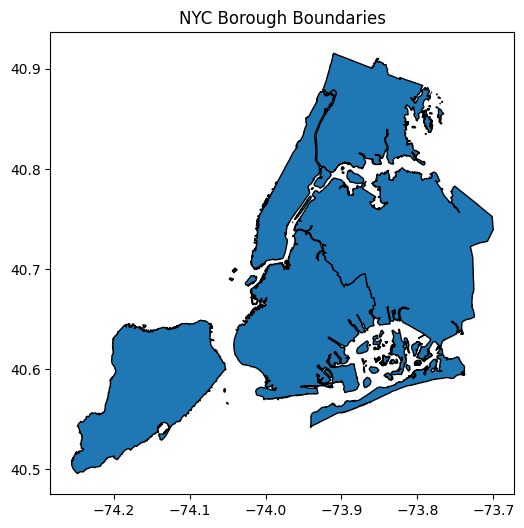

In [35]:
# Plot the boroughs
nyc.plot(edgecolor="black", figsize=(8, 6))
plt.title("NYC Borough Boundaries")
plt.show()

In [23]:
dataset = gpd.read_file(r"C:\Users\ADMIN\Downloads\110m_cultural\ne_110m_admin_0_countries_lakes.shp")

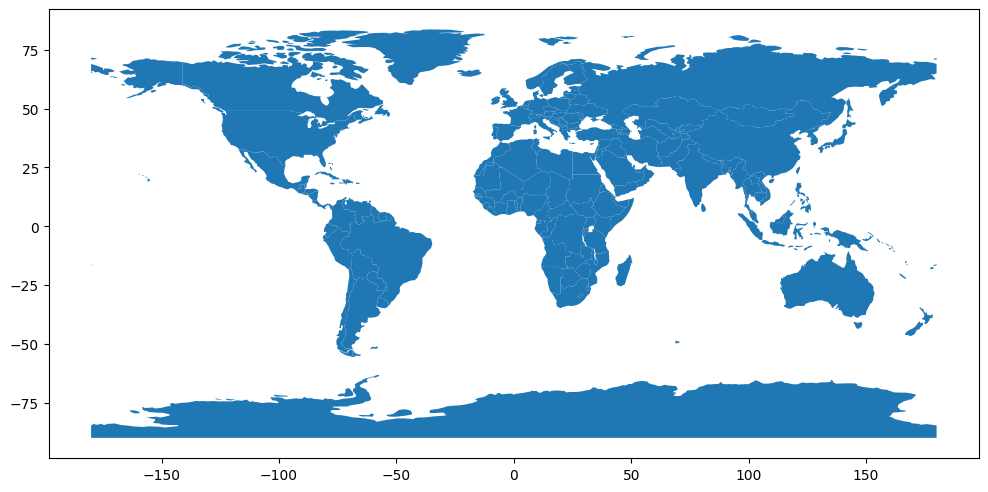

In [7]:
dataset.plot(figsize = (12,6))
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_824\1304836551.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dataset['buffer'] = dataset.buffer(1)


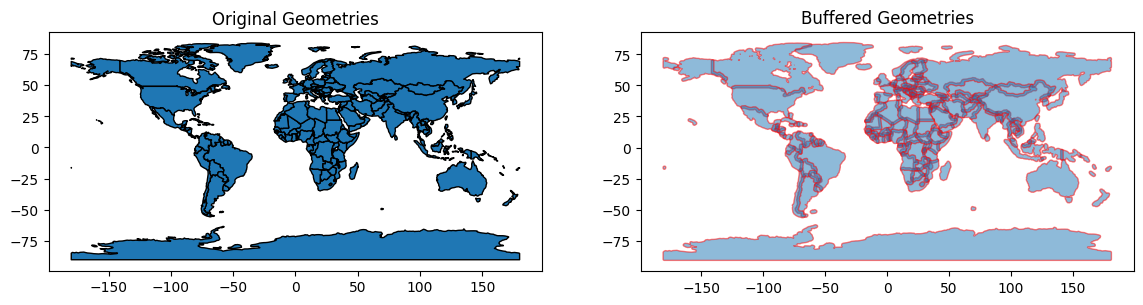

In [8]:
dataset['buffer'] = dataset.buffer(1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
dataset.plot(ax=ax[0], edgecolor="black")
dataset["buffer"].plot(ax=ax[1], edgecolor="red", alpha=0.5)

ax[0].set_title("Original Geometries")
ax[1].set_title("Buffered Geometries")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_824\2716616706.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dataset["centroid"] = dataset.geometry.centroid


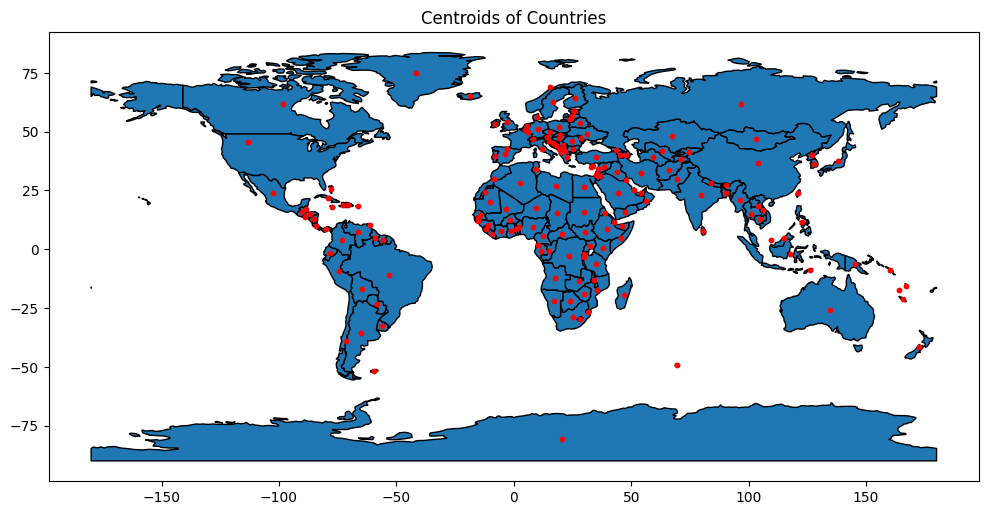

In [10]:
dataset["centroid"] = dataset.geometry.centroid

# Plot the centroids
fig, ax = plt.subplots(figsize=(12, 6))
dataset.plot(ax=ax, edgecolor="black")
dataset["centroid"].plot(ax=ax, color="red", markersize=10)

ax.set_title("Centroids of Countries")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_824\3786152328.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kenya['Buffer'] = kenya.geometry.buffer(2)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_824\3786152328.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\AD

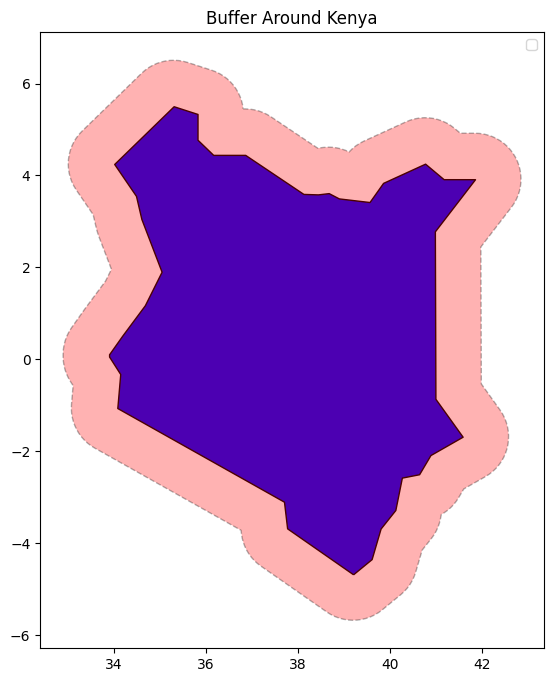

In [18]:
kenya = dataset[dataset['ADMIN'] == 'Kenya']
kenya['Buffer'] = kenya.geometry.buffer(2)
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Kenya
kenya.geometry.plot(ax=ax, color="blue", edgecolor="black", label="Kenya")

# Plot the buffer
kenya["buffer"].plot(ax=ax, color="red", alpha=0.3, edgecolor="black", linestyle="--", label="Buffer Zone")

ax.set_title("Buffer Around Kenya")
ax.legend()
plt.show()




In [19]:
from shapely.geometry import box

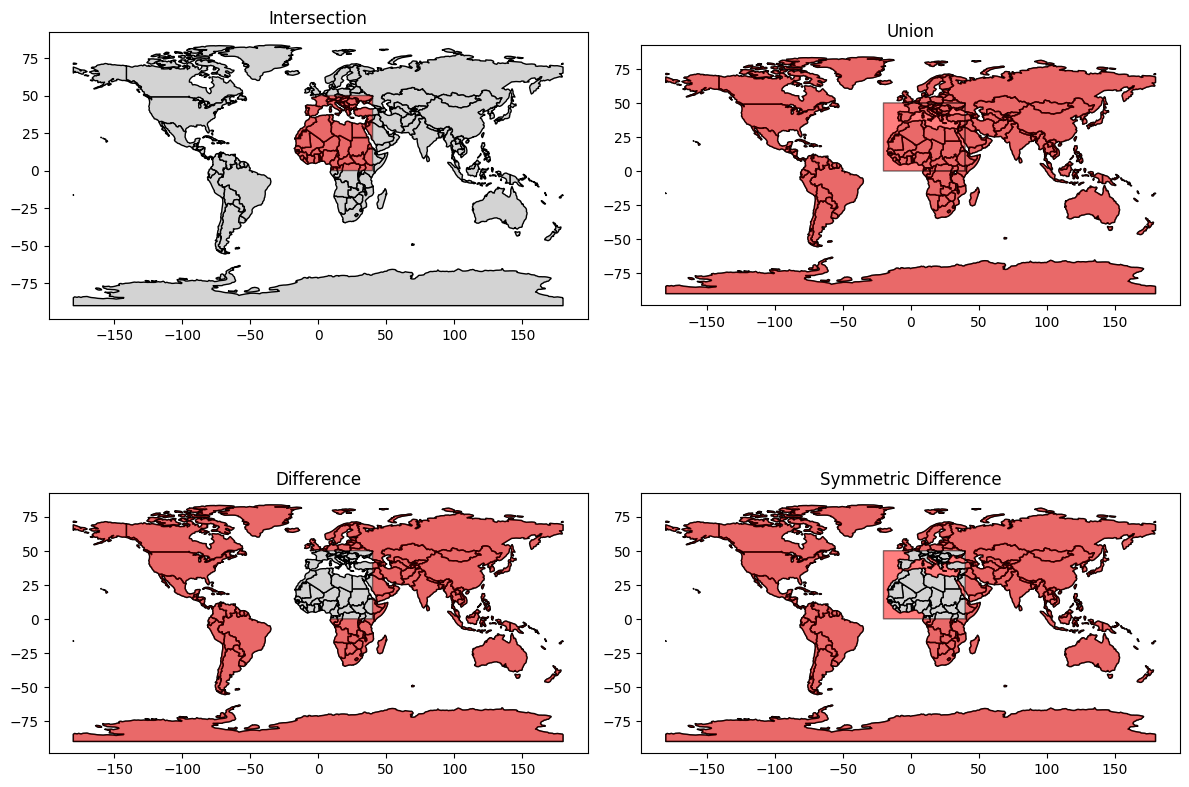

In [21]:
# Create a sample rectangular geometry (bounding box)
bbox = gpd.GeoDataFrame(geometry=[box(-20, 0, 40, 50)], crs=world.crs)

# Perform overlay operations
intersection = gpd.overlay(world, bbox, how='intersection')
union = gpd.overlay(world, bbox, how='union')
difference = gpd.overlay(world, bbox, how='difference')
symmetric_difference = gpd.overlay(world, bbox, how='symmetric_difference')

# Plot results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ['Intersection', 'Union', 'Difference', 'Symmetric Difference']
overlays = [intersection, union, difference, symmetric_difference]

for ax, overlay, title in zip(axes.flatten(), overlays, titles):
    world.plot(ax=ax, color="lightgrey", edgecolor="black")
    overlay.plot(ax=ax, color="red", edgecolor="black", alpha=0.5)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [30]:
gdf_continent = dataset.dissolve(by="CONTINENT", aggfunc={"POP_EST": "sum"})

# Reset index to clean the GeoDataFrame
gdf_continent.reset_index(inplace=True)

# Display aggregated population per continent
gdf_continent[["CONTINENT", "POP_EST"]]


     

,CONTINENT,POP_EST
0,Africa,1.306370e+09
1,Antarctica,4.490000e+03
2,Asia,4.550277e+09
3,Europe,7.454125e+08
4,North America,5.837560e+08
5,Oceania,4.120487e+07
6,Seven seas (open ocean),1.400000e+02
7,South America,4.270667e+08


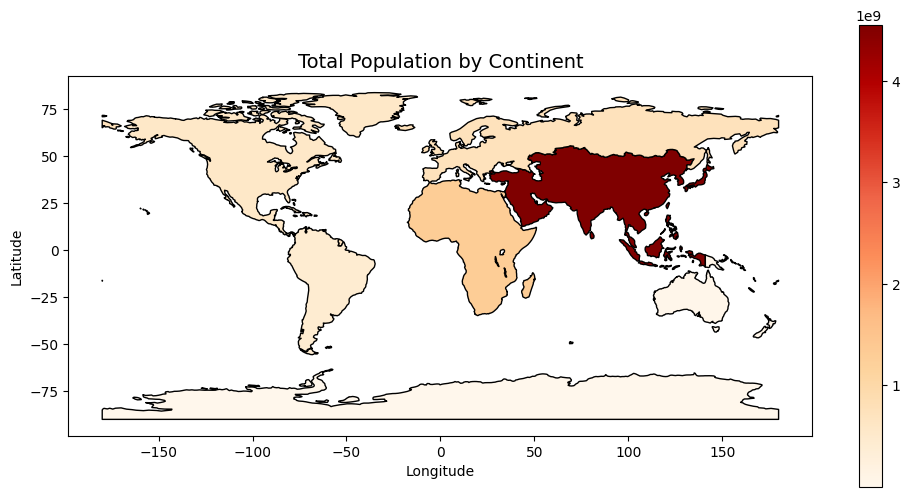

In [31]:
# Plot the aggregated map
fig, ax = plt.subplots(figsize=(12, 6))
gdf_continent.plot(column="POP_EST", cmap="OrRd", edgecolor="black", legend=True, ax=ax)

# Customize the plot
plt.title("Total Population by Continent", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
